In [6]:
import pandas as pd

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/House /Post-2023-11-17.csv')

<ipython-input-8-e93adb10c462>:1: DtypeWarning: Columns (10,11,12,13,16,17,55,56,58,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/House /Post-2023-11-17.csv')


In [9]:
df_description = df['description']

### **Cleaning Text**

In [10]:
df_description_dist = df_description.str.split('|', expand=True)

In [11]:
df_description_dist = df_description_dist[[0, 3]]

In [12]:
df_description_dist

,0,3
0,۹۰متری دوخوابه _ شهرک مسکونی چیتگر وام دودرصدی,خرید و فروش ❌با پرداخت اقساط ۴۸ ماهه میتوان خا...
1,شهرک غرب _ عمارت سلطنتی _ ۱۵۸ متر _ فول,خرید و فروش . درود ب...
2,۴۰۰ متر ۴ خواب مستر تکواحدی تاپ لوکیشن,خرید و فروش سازه ای خاص از سازنده بنام منطقه\n...
3,اردستانی نگین غرب 92متر,خرید و فروش اکازیون اکازیون زیر قیمت فروشنده و...
4,۸۶ متر شهرک دانشگاه شریف سند دار اردستانی خرازی,خرید و فروش مشخصات واحد:\nمتراژ زمین : ۶۰۰ متر...
...,...,...
80722,آپارتمان دوخواب_غرق نور_وام,خرید و فروش پروژه فاخر ومدرن اپارتمان خوش نقش...
80723,64متر_خوش نقشه_سازمان بزنامه,خرید و فروش ✅سالن مربع و خوش چیدمان \n✅اتاق غر...
80724,۱۰۰متر_کلیدنخورده_نوساز خام_اندیشه فازیک,خرید و فروش بنام خدا \n\n اعتمادشما اع...
80725,آپارتمان یک خوابه ۵۱ متر,خرید و فروش لطفا املاک تماس نگیرد\nآپارتمان تک...


In [13]:
# Remove any numbers from the elements
series = df_description_dist[0].str.replace(r'[\d*]+', '', regex=True)


In [14]:
# series.str.split(',')
series1 = series.str.split(',', expand=True)[0]
# split_series = series1.str.split(' ').apply(lambda x: [item.split('_') for item in x])
series2 = series1.str.split('_', expand=True)
series2

,0,1,2,3,4
0,متری دوخوابه,شهرک مسکونی چیتگر وام دودرصدی,None,None,None
1,شهرک غرب,عمارت سلطنتی,متر,فول,None
2,متر خواب مستر تکواحدی تاپ لوکیشن,None,None,None,None
3,اردستانی نگین غرب متر,None,None,None,None
4,متر شهرک دانشگاه شریف سند دار اردستانی خرازی,None,None,None,None
...,...,...,...,...,...
80722,آپارتمان دوخواب,غرق نور,وام,None,None
80723,متر,خوش نقشه,سازمان بزنامه,None,None
80724,متر,کلیدنخورده,نوساز خام,اندیشه فازیک,None
80725,آپارتمان یک خوابه متر,None,None,None,None


In [15]:
series20 = series2[0].str.split(' ', expand = True)
series21 = series2[1].str.split(' ', expand = True)
series22 = series2[2].str.split(' ', expand = True)
series23 = series2[3].str.split(' ', expand = True)
series24 = series2[4].str.split(' ', expand = True)

In [16]:
def extract_non_null_values(df):
    non_null_values = {}
    for column in df.columns:
        non_null_values[column] = df[column].dropna().values
    return non_null_values


In [17]:
series20_dict  = extract_non_null_values(series20)
series21_dict  = extract_non_null_values(series21)
series22_dict  = extract_non_null_values(series22)
series23_dict  = extract_non_null_values(series23)
series24_dict  = extract_non_null_values(series24)

In [18]:
list_series20 = []
for i in range(len(series20_dict.values())):
  list_series20.append(series20_dict.get(i).tolist())

list_series21 = []
for i in range(len(series21_dict.values())):
  list_series21.append(series21_dict.get(i).tolist())

list_series22 = []
for i in range(len(series22_dict.values())):
  list_series22.append(series22_dict.get(i).tolist())

list_series23 = []
for i in range(len(series23_dict.values())):
  list_series23.append(series23_dict.get(i).tolist())

list_series24 = []
for i in range(len(series24_dict.values())):
  list_series24.append(series24_dict.get(i).tolist())


In [19]:
# Flatten the list
flattened_list_series20 = [item for sublist in list_series20 for item in sublist]
flattened_list_series21 = [item for sublist in list_series21 for item in sublist]
flattened_list_series22 = [item for sublist in list_series22 for item in sublist]
flattened_list_series23 = [item for sublist in list_series23 for item in sublist]
flattened_list_series24 = [item for sublist in list_series24 for item in sublist]

list_series2 = [flattened_list_series20, flattened_list_series21, flattened_list_series22, flattened_list_series23, flattened_list_series24]
series0 = [item for sublist in list_series2 for item in sublist]

kfb.sgfo;ghf;oaih

In [20]:
# Remove any numbers from the elements
series3 = df_description_dist[3].str.replace(r'[\d*]+', '', regex=True)


In [21]:
# series.str.split(',')
series3 = series3.str.split(',', expand=True)[0]
# split_series = series1.str.split(' ').apply(lambda x: [item.split('_') for item in x])
# series3 = series3.str.split('_', expand=True)
series3 = series3.str.replace(r'[\d*]+', '', regex=True)
series3

0        خرید و فروش ❌با پرداخت اقساط  ماهه میتوان خانه...
1        خرید و فروش .                           درود ب...
2        خرید و فروش سازه ای خاص از سازنده بنام منطقه\n...
3        خرید و فروش اکازیون اکازیون زیر قیمت فروشنده و...
4        خرید و فروش مشخصات واحد:\nمتراژ زمین :  متر\nم...
                               ...                        
80722    خرید و فروش پروژه فاخر ومدرن  اپارتمان خوش نقش...
80723    خرید و فروش ✅سالن مربع و خوش چیدمان \n✅اتاق غر...
80724    خرید و فروش بنام خدا \n\n         اعتمادشما اع...
80725    خرید و فروش لطفا املاک تماس نگیرد\nآپارتمان تک...
80726    خرید و فروش درود بر شما\nمتر ویلای دوبلکس نوسا...
Name: 0, Length: 80727, dtype: object

In [22]:
import re

# Regular expression pattern for extracting Persian words
pattern = r'[\u0600-\u06FF\s]+'

# Extract Persian words from the series
persian_words = series3.str.findall(pattern)

# Display the extracted Persian words
print(persian_words)

0        [خرید و فروش , با پرداخت اقساط  ماهه میتوان خا...
1        [خرید و فروش ,                            درود...
2        [خرید و فروش سازه ای خاص از سازنده بنام منطقه\...
3        [خرید و فروش اکازیون اکازیون زیر قیمت فروشنده ...
4        [خرید و فروش مشخصات واحد, \nمتراژ زمین ,   متر...
                               ...                        
80722    [خرید و فروش پروژه فاخر ومدرن  اپارتمان خوش نق...
80723    [خرید و فروش , سالن مربع و خوش چیدمان \n, اتاق...
80724    [خرید و فروش بنام خدا \n\n         اعتمادشما ا...
80725    [خرید و فروش لطفا املاک تماس نگیرد\nآپارتمان ت...
80726    [خرید و فروش درود بر شما\nمتر ویلای دوبلکس نوس...
Name: 0, Length: 80727, dtype: object


In [23]:
import re

def extract_persian_words(text):
    persian_words = re.findall(r'[\u0600-\u06FF\s]+', text)
    return persian_words

# Apply the function to the series
persian_words_list = persian_words.apply(lambda x: extract_persian_words(str(x)))

In [24]:
persian_words_list1 = persian_words_list.apply(lambda x: extract_persian_words(str(x)))

In [25]:
import numpy as np

In [26]:
# Convert the list to a pandas series
ser = pd.Series(persian_words_list1)

# Replace empty strings with NaN values
ser = ser.replace(' ', pd.NA)

# Remove the rows with NaN values
ser = ser.dropna()

# ser[0]

In [27]:
ser3 = [item for sublist in ser for item in sublist]
series_ser3 = pd.Series(ser3)

In [28]:
# series_ser3.str.split(' ', expand = True)

In [29]:
# series_ser3.str.split(' ', expand = True)

In [30]:
series_ser3

0                                       خرید و فروش 
1                                                   
2                                                   
3                                                   
4           با پرداخت اقساط  ماهه میتوان خانه دار شد
                             ...                    
4079259                                فروشنده واقعی
4079260                                             
4079261    بخشی از ثمن معامله قابل تهاتر با اپارتمان
4079262                                             
4079263                           نظریان مسکن دادمان
Length: 4079264, dtype: object

### **Wordcloud**

In [37]:
import pandas as pd

# create a sample series
data = series_ser3

# concatenate all the strings
text = data.str.cat(sep=' ')

print(text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [79]:
sorted_dict = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:100])
sorted_dict

{'و': 8753,
 '  ': 8241,
 '      ': 7607,
 '       ': 6040,
 '   ': 5653,
 ' ': 3277,
 'خرید': 3247,
 'فروش': 3193,
 '        ': 2264,
 'با': 2239,
 'به': 2144,
 'در': 1967,
 'متر': 1624,
 'خواب': 1589,
 '          ': 1565,
 '،': 1520,
 'منطقه': 1404,
 'پارکینگ': 1386,
 'شما': 1333,
 'واحد': 1301,
 'عالی': 1301,
 'طبقه': 1223,
 'از': 1220,
 'سالن': 1137,
 'نقشه': 1109,
 'بدون': 1083,
 'بزرگ': 1028,
 'املاک': 982,
 '           ': 971,
 'تماس': 957,
 'دسترسی': 951,
 'مشاور': 948,
 'خوش': 932,
 'انباری': 926,
 'های': 864,
 'نور': 849,
 'قیمت': 843,
 'تا': 806,
 'بهترین': 791,
 'فول': 787,
 'برای': 764,
 'تک': 763,
 'امکانات': 750,
 'یک': 730,
 'لوکیشن': 723,
 'دو': 704,
 'شده': 697,
 'دارای': 658,
 'متری': 636,
 'آسانسور': 627,
 'سند': 626,
 'خور': 596,
 'لابی': 594,
 'سندی': 585,
 '    ': 561,
 'قابلیت': 540,
 'بالکن': 534,
 'واحدی': 525,
 'واقعی': 519,
 'بسیار': 517,
 'مشاعات': 514,
 'سرمایه': 507,
 'آپارتمان': 501,
 'بازدید': 489,
 'پرده': 487,
 'چیدمان': 485,
 'رهن': 475,
 'مناسب': 46

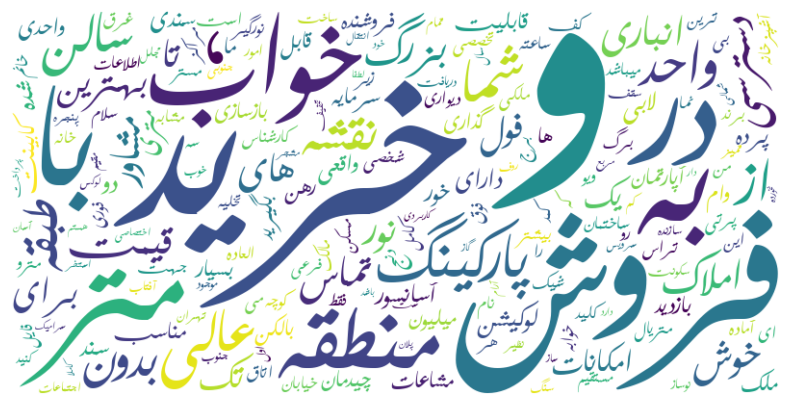

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper

# Assuming word_counts is a dictionary of word counts
# word_counts = {"کلمه1": 20, "کلمه2": 15, "کلمه3": 10}

# Reshape and display Persian words
reshaped_text = arabic_reshaper.reshape(' '.join(word_counts.keys()))
persian_text = get_display(reshaped_text)

# Generate word cloud
wordcloud = WordCloud(font_path='/content/Mj_Farsi Simple Normal_0.ttf', background_color='white', width=800, height=400,
                      regexp=r"[\u0600-\u06FF]+").generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **feature creation**

In [61]:
df.head(3)

,id,is_active,created_at,token,token_code,city_rel,city_name,image_count,title,top_description_text,...,meter,rooms,floor,total_price,price_per_meter,real_state_agency,real_state_agent,year,land_meter,house_status
0,80881,1,2023-11-17 17:22:18,82058,QZBNWVif,NaN,tehran,12.0,۹۰متری دوخوابه _ شهرک مسکونی چیتگر وام دودرصدی...,NaN,...,۹۰,۲,۸ از ۱۲,۹۹۰٬۰۰۰٬۰۰۰ تومان,۱۱٬۰۰۰٬۰۰۰ تومان,دفتر فروش مرکزی,منصوری,۱۴۰۲,NaN,NaN
1,80880,1,2023-11-17 17:22:18,82057,QZ6gqnCh,NaN,tehran,20.0,شهرک غرب _ عمارت سلطنتی _ ۱۵۸ متر _ فول|فروش آ...,NaN,...,۱۵۸,۳,۴ از ۷,۴۳٬۰۰۰٬۰۰۰٬۰۰۰ تومان,۲۷۲٬۱۵۱٬۰۰۰ تومان,گروه مشاورين املاک يوسفيان,علی معصومی,۱۴۰۲,NaN,NaN
2,80879,1,2023-11-17 17:22:18,82056,QZI16P85,NaN,tehran,10.0,۴۰۰ متر ۴ خواب مستر تکواحدی تاپ لوکیشن|فروش آپ...,NaN,...,۴۰۰,۴,۲,۱۰۰٬۰۰۰٬۰۰۰٬۰۰۰ تومان,۲۵۰٬۰۰۰٬۰۰۰ تومان,املاک ایوان,تیرداد,۱۳۹۵,NaN,NaN


In [65]:
# Search for a word in the 'Text' column
df['Contains_metro'] = df['title'].str.contains('مترو')

# Print the updated DataFrame
# print(df)
df[df['Contains_metro'] == True]

,id,is_active,created_at,token,token_code,city_rel,city_name,image_count,title,top_description_text,...,rooms,floor,total_price,price_per_meter,real_state_agency,real_state_agent,year,land_meter,house_status,Contains_metro
1166,79715,1,2023-11-17 16:30:32,80723,QZBdyGf4,NaN,tehran,5.0,40 متری تکوااحد چسب مترو|فروش آپارتمان|تهران، ...,NaN,...,۱,۲,۲٬۰۳۰٬۰۰۰٬۰۰۰ تومان,۵۰٬۷۵۰٬۰۰۰ تومان,املاک عطا,جاوید,۱۳۸۵,NaN,NaN,True
2125,78756,1,2023-11-17 15:47:52,79640,QZPR0K9S,NaN,tehran,15.0,۸۰مترواقعی. امیرآباد شمالی خ۱۴ بن بست کیهان|فر...,NaN,...,۲,۱,۷۵٬۵۰۰٬۰۰۰٬۰۰۰ تومان,۱٬۰۰۶٬۶۶۶٬۰۰۰ تومان,NaN,NaN,۱۳۷۸,NaN,NaN,True
2215,78666,1,2023-11-17 15:44:20,79534,QZQV90cn,NaN,tehran,4.0,۵۶مترفول امکانات ارزنده لوکیشن طلا نزدیک مترو|...,NaN,...,۱,۵ از ۵,۳٬۴۰۰٬۰۰۰٬۰۰۰ تومان,۶۰٬۷۱۴٬۰۰۰ تومان,NaN,کارشناس املاک رضائی,۱۳۸۷,NaN,NaN,True
2282,78599,1,2023-11-17 15:42:12,79461,QZQpt46Y,NaN,tehran,7.0,۵۶ متر _ فول بازسازی _ جیحون ، آزادی _ مترو شا...,NaN,...,۱,۲ از ۲,۲٬۷۰۰٬۰۰۰٬۰۰۰ تومان,۴۸٬۲۱۴٬۰۰۰ تومان,مجموعه املاک متین,محمد مولایی,۱۳۷۵,NaN,NaN,True
2381,78500,1,2023-11-17 15:39:11,79353,QZRN-No0,NaN,tehran,10.0,۳۰ متر روبروی مترو شهید مدنی با مستاجر|فروش آپ...,NaN,...,بدون اتاق,۳ از ۳,۱٬۹۵۰٬۰۰۰٬۰۰۰ تومان,۶۵٬۰۰۰٬۰۰۰ تومان,NaN,NaN,۱۳۸۸,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79575,1152,1,2023-11-12 18:13:08,1152,QZLNkR_H,NaN,tehran,9.0,حسین آباد ۸۵متر ۲ خواب رو به آفتاب جنب مترو|فر...,NaN,...,۲,۵,۹٬۰۰۰٬۰۰۰٬۰۰۰ تومان,۱۰۵٬۸۸۲٬۰۰۰ تومان,NaN,خشایار نوری,۱۳۸۵,NaN,NaN,True
79996,731,1,2023-11-12 17:44:34,731,QZQ9PNWv,NaN,tehran,8.0,۴۵ متر نواب مترو بریانک وامدار|فروش آپارتمان|ت...,NaN,...,۱,۳ از ۳,۱٬۳۳۰٬۰۰۰٬۰۰۰ تومان,۲۹٬۵۵۵٬۰۰۰ تومان,کاخ,سعید تیموری,۱۳۸۲,NaN,NaN,True
80446,281,1,2023-11-12 17:44:11,281,QZCVaBXL,NaN,tehran,20.0,فروش،معاوضه چارخواب برج عرفان ویودریاچه روبرو ...,NaN,...,۴,۱۰ از ۱۵,۱۹٬۹۰۰٬۰۰۰٬۰۰۰ تومان,۷۶٬۵۳۸٬۰۰۰ تومان,NaN,علی الماسی,۱۳۹۴,NaN,NaN,True
80585,142,1,2023-11-12 17:44:03,142,QZPVXKPr,NaN,tehran,6.0,آپارتمان57متری_انباری_بالکن_دسترسی به مترو|فرو...,NaN,...,۱,۱,۲٬۹۵۰٬۰۰۰٬۰۰۰ تومان,۵۱٬۷۵۴٬۰۰۰ تومان,املاک یاسان,عرفان رهنما,۱۳۸۰,NaN,NaN,True


In [113]:
# df['Contains_teras'] = df['title'].str.contains('تراس' | 'بالکن')
df['Contains_teras'] = df['title'].str.contains('تراس|بالکن', regex=True)

df['Contains_komod'] = df['title'].str.contains('کمد')
df['Contains_master'] = df['title'].str.contains('مستر')
df['Contains_kabinet'] = df['title'].str.contains('کابینت')
# df['Contains_metro'] = df['title'].str.contains('مترو')
df['Contains_vam'] = df['title'].str.contains('وام')
df['Contains_moshaat'] = df['title'].str.contains('مشاعات')
df['Contains_vahedi'] = df['title'].str.contains('واحدی')
df['Contains_sanad'] = df['title'].str.contains('سند')
df['Contains_noor'] = df['title'].str.contains('نور')
df['Contains_salon'] = df['title'].str.contains('سالن')
df['Contains_labi'] = df['title'].str.contains('لابی')
df['Contains_naghshe'] = df['title'].str.contains('نقشه')
df['Contains_noori'] = df['title'].str.contains('نوری')
df['Contains_material'] = df['title'].str.contains('متریال')
df['Contains_noorgir'] = df['title'].str.contains('نورگیر')


In [83]:
df.columns

Index(['id', 'is_active', 'created_at', 'token', 'token_code', 'city_rel',
       'city_name', 'image_count', 'title', 'top_description_text',
       'middle_description_text', 'bottom_description_text', 'red_text',
       'checkable', 'label', 'label_color', 'is_checked', 'has_chat',
       'district_persian', 'city_persian', 'category_slug_persian',
       'last_post_date', 'first_post_date', 'brand_model', 'business_ref',
       'business_type', 'cat_1', 'cat_2', 'cat_3', 'category', 'city',
       'credit', 'district', 'gender', 'originality', 'price', 'rent',
       'status', 'image_url', 'web_url', 'unavailable_after', 'description',
       'chat_enabled', 'suggestion_tokens', 'elevator', 'not_elevator',
       'parking', 'not_parking', 'depot', 'not_depot', 'map_type', 'latitude',
       'longitude', 'radius', 'map_image_url', 'balcony', 'not_balcony',
       'check_cost_limit', 'check_cost', 'pricing_cost', 'meter', 'rooms',
       'floor', 'total_price', 'price_per_meter', 're

In [ ]:
df[df['Contains_teras'] == True][['balcony', 'Contains_teras']].isnull().sum()

In [ ]:
len(df[df['Contains_teras'] == True][['balcony', 'Contains_teras']])

In [ ]:
df[df['balcony'] == True]

In [ ]:
df[(df['balcony'] == True) & (df['Contains_teras'] == True)]

In [ ]:
df[df['Contains_komod'] == True]

In [ ]:
df[df['Contains_master'] == True]

In [ ]:
df[df['Contains_kabinet'] == True]

In [ ]:
df[df['Contains_vam'] == True]

In [ ]:
df[df['Contains_moshaat'] == True]

In [ ]:
df[df['Contains_vahedi'] == True]

In [ ]:
df[df['Contains_labi'] == True]

In [ ]:
df[df['Contains_naghshe'] == True]

In [115]:
df[df['Contains_noorgir'] == True].shape[0]

750

In [116]:
df[df['Contains_noori'] == True].shape[0]

38

In [117]:
df[df['Contains_noor'] == True].shape[0]

4411

In [96]:
# if (df['balcony'] == True) & (df['Contains_teras'] == True):
#   df['balcony_total'] == True
# elif (df['balcony'] == True) & (df['Contains_teras'] == False):
#   df['balcony_total'] == True
# elif (df['balcony'] == False) & (df['Contains_teras'] == True):
#   df['balcony_total'] == True
# elif (df['balcony'] == np.NAN) & (df['Contains_teras'] == True):
#   df['balcony_total'] == True
# elif (df['balcony'] == np.NAN) & (df['Contains_teras'] == False):
#   df['balcony_total'] == False
# else:
#   df['balcony_total'] == False



In [97]:
import numpy as np

df['balcony_total'] = np.where((df['balcony'] == True) & (df['Contains_teras'] == True), True,
                               np.where((df['balcony'] == True) & (df['Contains_teras'] == False), True,
                                        np.where((df['balcony'] == False) & (df['Contains_teras'] == True), True,
                                                 np.where((df['balcony'].isnull()) & (df['Contains_teras'] == True), True,
                                                          np.where((df['balcony'].isnull()) & (df['Contains_teras'] == False), False, False)))))

In [99]:
df['balcony_total'].value_counts()

False    79372
True      1355
Name: balcony_total, dtype: int64

In [101]:
df_balcona = df[['balcony', 'Contains_teras', 'balcony_total']]

In [102]:
df_balcona[df_balcona['balcony'] == True]

,balcony,Contains_teras,balcony_total
5336,True,False,True
5344,True,False,True
5346,True,False,True
5347,True,False,True
5357,True,False,True
...,...,...,...
80472,True,False,True
80537,True,False,True
80615,True,False,True
80717,True,False,True


In [109]:
df_balcona[(df['balcony'].isnull()) & (df['Contains_teras'] == True)]

,balcony,Contains_teras,balcony_total
286,NaN,True,True
296,NaN,True,True
330,NaN,True,True
434,NaN,True,True
509,NaN,True,True
...,...,...,...
80215,NaN,True,True
80247,NaN,True,True
80291,NaN,True,True
80468,NaN,True,True


In [119]:
df.shape[0]

80727

In [136]:
df['noor_total'] = ((df['Contains_noor'] == True) & (df['Contains_noori'] == False) & (df['Contains_noorgir'] == False))|((df['Contains_noor'] == False) & (df['Contains_noori'] == True) & (df['Contains_noorgir'] == False))|((df['Contains_noor'] == False) & (df['Contains_noori'] == False) & (df['Contains_noorgir'] == True))|((df['Contains_noor'] == True) & (df['Contains_noori'] == True) & (df['Contains_noorgir'] == False))|((df['Contains_noor'] == True) & (df['Contains_noori'] == False) & (df['Contains_noorgir'] == True))|((df['Contains_noor'] == False) & (df['Contains_noori'] == True) & (df['Contains_noorgir'] == True))|((df['Contains_noor'] == True) & (df['Contains_noori'] == True) & (df['Contains_noorgir'] == True))




In [137]:
df_noor = df[['Contains_noor', 'Contains_noori', 'Contains_noorgir', 'noor_total']]

In [143]:

df_noor[df_noor['Contains_noori'] == True]['noor_total'].value_counts()


True    38
Name: noor_total, dtype: int64

In [144]:
df_noor[df_noor['Contains_noori'] == True].shape[0]

38

In [145]:
df_noor[df_noor['Contains_noor'] == True]['noor_total'].value_counts()


True    4411
Name: noor_total, dtype: int64

In [146]:
df_noor[df_noor['Contains_noor'] == True].shape[0]

4411

In [147]:
df_noor[df_noor['Contains_noorgir'] == True]['noor_total'].value_counts()


True    750
Name: noor_total, dtype: int64

In [148]:
df_noor[df_noor['Contains_noorgir'] == True].shape[0]

750